**<p style = "text-align: center">TRƯỜNG ĐẠI HỌC KHOA HỌC TỰ NHIÊN - ĐẠI HỌC QUỐC GIA TPHCM</p>**

# **<p style = "text-align: center">LẬP TRÌNH KHOA HỌC DỮ LIỆU</p>**
## **<p style = "text-align: center">Đồ án Cuối kì</p>**
### <p style = "text-align: center"> <b>Đề tài:</b> Xử lí, phân tích và khám phá dữ liệu về sức khỏe tinh thần của nhân viên công nghệ (Mental Health in Tech)</p>
*<p style = "text-align: center">Bộ dữ liệu này là từ một cuộc khảo sát năm 2014 đo lường thái độ đối với sức khỏe tâm thần và tần suất rối loạn sức khỏe tâm thần của những người làm việc trong lĩnh vực công nghệ.</p>*
**Sinh viên thực hiện:**

| Mã số sinh viên | Họ và tên |
| --- | --- |
| 21120576 | Trần Đình Nhật Trí |
| 21120590 | Nguyễn Thủy Uyên |
| 21120501 | Nguyễn Ngọc Gia Minh |

<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
   Preprocessing
</div>

## Import thư viện

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [16]:
raw_df = pd.read_csv('Data/survey.csv')
raw_df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


### Dataset có bao nhiêu dòng và cột?

In [17]:
raw_df.shape

(1259, 27)

Có 1259 dòng và 27 cột dữ liệu

### Ý nghĩa của từng dòng dữ liệu

- Tập dữ liệu này lấy từ một cuộc khảo sát năm 2014 nhằm đo lường thái độ đối với sức khỏe tâm thần và tần suất rối loạn sức khỏe tâm thần tại nơi làm việc.
- Mỗi dòng là câu trả lời của một người tham gia khảo sát, và thể hiện được các phần như: Thông tin cơ bản của người trả lời (ẩn danh); Thái độ đối với vấn đề sức khỏe tinh thần của chính mình; Cách các công ty, tổ chức cung cấp quyền lợi cho nhân viên có vấn đề sức khỏe tinh thần và thể chất như thế nào;...

### Ý nghĩa các trường dữ liệu

Đọc file `description.csv` trong để hiểu rõ hơn về các cột ta đang làm việc. Lưu vào DataFrame `col_meaning_df` và index chính là `Title` - tên các trường dữ liệu.

In [18]:
pd.set_option('display.max_colwidth', 500)

col_meaning_df = pd.read_csv('Data/description.csv', index_col='Title')
col_meaning_df 

,Meaning
Title,
Timestamp,Thời gian nộp khảo sát
Age,Tuổi
Gender,Giới tính
Country,Quốc gia sinh sống
state,Tên tiểu bang sinh sống
self_employed,Bạn có tự kinh doanh không?
family_history,Gia đình có tiền sử bệnh tâm thần không?
treatment,Bạn đã tìm cách điều trị tình trạng sức khỏe tâm thần chưa?
work_interfere,"Nếu bạn có vấn đề về sức khỏe tâm thần, bạn có cảm thấy nó cản trở công việc của mình không?"


### Xem thử các dòng trong data có bị trùng lặp hay không

In [19]:
duplicated = raw_df.duplicated().any()
duplicated

False

Vậy dữ liệu không có dòng trùng lặp. Ta tiến hành bước tiếp theo

### Loại dữ liệu của mỗi cột là gì? Chúng có phù hợp để xử lí sau này không?

Ta xem xét loại dữ liệu của toàn bộ các cột

In [20]:
raw_df.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

Các cột có kiểu dữ liệu phù hợp. Tuy nhiên ở cột `Timestamp` ta sẽ chuyển thành kiểu `datetime`.

In [21]:
raw_df['Timestamp'] = pd.to_datetime(raw_df['Timestamp'])
raw_df.dtypes

Timestamp                    datetime64[ns]
Age                                   int64
Gender                               object
Country                              object
state                                object
self_employed                        object
family_history                       object
treatment                            object
work_interfere                       object
no_employees                         object
remote_work                          object
tech_company                         object
benefits                             object
care_options                         object
wellness_program                     object
seek_help                            object
anonymity                            object
leave                                object
mental_health_consequence            object
phys_health_consequence              object
coworkers                            object
supervisor                           object
mental_health_interview         

Các cột đã được đưa về đúng kiểu dữ liệu.

## Với mỗi cột có kiểu là dữ liệu số, những giá trị trong cột đó được phân bố như thế nào?
Để trả lời câu hỏi này, trước tiên ta sẽ lọc những cột có kiểu dữ liệu số có trong `raw_df`:

In [22]:
numeric_cols = raw_df.select_dtypes(include='number')
numeric_cols

,Age
0,37
1,44
2,32
3,31
4,31
...,...
1254,26
1255,32
1256,34
1257,46


Như ta thấy, chỉ có duy nhất cột `Age` là cột có dữ liệu số.
Ta sẽ kiểm tra tổng quan giá trị trong `Age` được phân bố như thế nào:

In [23]:
# plt.figsize=(15,2)
# sns.histplot(numeric_col, x='Age')
pd.set_option('display.float_format', lambda x : '%.2f' %x)
numeric_cols.describe()

,Age
count,1259.00
mean,79428148.31
std,2818299442.98
min,-1726.00
25%,27.00
50%,31.00
75%,36.00
max,99999999999.00


Trong cột `Age` có dữ liệu bất bình thường, nguyên nhân là do: Số tuổi **lớn nhất** `Max` là rất lớn và số tuổi **bé nhất** `Min` là một số âm. Hai giá trị này là rất vô lý khi nó xuất hiện trong thuộc tính độ tuổi.

Tiếp theo ta kiểm tra tỉ lệ missing values chiếm trong cột này là bao nhiêu:

In [24]:
percent_missing = numeric_cols.isnull().sum() * 100 / len(numeric_cols)
percent_missing

Age   0.00
dtype: float64

Không có missing values nào tồn tại trong `Age`.

**Nhận xét:**
- Cột dữ liệu số trong bộ dữ liệu này là bất bình thường do xuất hiện những giá trị vô lý trong bảng dữ liệu, khiến dữ liệu bị sai lệch. Chúng được gọi là các giá trị ngoại lai `outliers`.
- Độ tuổi làm việc trong môi trường công nghệ thường nằm trong phạm vi **18 đến 75 tuổi**. Do đó trong quá trình tìm hiểu và phân tích dữ liệu để trả lời câu hỏi, nếu sử dụng cột này, ta sẽ cần phải loại bỏ những `outliers` này.

## Với các cột dữ liệu kiểu categorical, ta xem xét sự phân bố

In [25]:
cate_cols_df =  raw_df.select_dtypes(exclude = 'number')
cate_cols_df

,Timestamp,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,Female,United States,IL,NaN,No,Yes,Often,6-25,No,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,Male,United States,TX,NaN,No,No,Never,100-500,Yes,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,No,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,Male,United States,IL,No,Yes,Yes,Often,26-100,Yes,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,No,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,f,United States,NC,No,No,No,NaN,100-500,Yes,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


### Kiểm tra tỉ lệ giá trị bị thiếu, số các giá trị khác biệt, sự phân bố dữ liệu ở các cột kiểu categorical
Nhận xét: Ta nhận thấy ở cột **Gender** có một số giá trị ngoại lai (bất thường như *mail, m, msle, csi-male, non-binary, All ...*). Đối với các cột còn lại ngoại trừ cột **comments** các giá trị trông có vẻ không có gì đáng ngại

In [26]:
def missing_ratios(col):
    return col.isnull().sum() * 100 / len(col)


cate_cols = cate_cols_df.agg(['nunique', lambda x: x.value_counts().to_dict(), missing_ratios])
cate_cols.index = ['num_diff_vals', 'distribution', 'missing_ratio']
cate_cols

,Timestamp,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
num_diff_vals,1246,49,48,45,2,2,2,4,6,2,...,5,3,3,3,3,3,3,3,2,160
distribution,"{2014-08-27 12:44:51: 2, 2014-08-27 14:22:43: 2, 2014-08-27 12:31:41: 2, 2014-08-28 16:52:34: 2, 2014-08-27 17:33:52: 2, 2014-08-27 12:54:11: 2, 2014-08-27 15:55:07: 2, 2014-08-27 12:37:50: 2, 2014-08-27 15:23:51: 2, 2014-08-28 09:59:39: 2, 2014-08-27 15:24:47: 2, 2014-08-28 16:58:33: 2, 2014-08-27 12:43:28: 2, 2014-08-28 17:02:29: 1, 2014-08-28 16:56:57: 1, 2014-08-28 17:10:00: 1, 2014-08-28 16:17:09: 1, 2014-08-28 16:31:00: 1, 2014-08-28 16:42:49: 1, 2014-08-28 16:52:23: 1, 2014-08-28 17:0...","{'Male': 615, 'male': 206, 'Female': 121, 'M': 116, 'female': 62, 'F': 38, 'm': 34, 'f': 15, 'Make': 4, 'Male ': 3, 'Woman': 3, 'Cis Male': 2, 'Man': 2, 'Female (trans)': 2, 'Female ': 2, 'Trans woman': 1, 'msle': 1, 'male leaning androgynous': 1, 'Neuter': 1, 'cis male': 1, 'queer': 1, 'Female (cis)': 1, 'Mail': 1, 'cis-female/femme': 1, 'A little about you': 1, 'Malr': 1, 'p': 1, 'femail': 1, 'Cis Man': 1, 'Guy (-ish) ^_^': 1, 'Enby': 1, 'Agender': 1, 'Androgyne': 1, 'Male-ish': 1, 'maile'...","{'United States': 751, 'United Kingdom': 185, 'Canada': 72, 'Germany': 45, 'Ireland': 27, 'Netherlands': 27, 'Australia': 21, 'France': 13, 'India': 10, 'New Zealand': 8, 'Poland': 7, 'Switzerland': 7, 'Sweden': 7, 'Italy': 7, 'South Africa': 6, 'Belgium': 6, 'Brazil': 6, 'Israel': 5, 'Singapore': 4, 'Bulgaria': 4, 'Austria': 3, 'Finland': 3, 'Mexico': 3, 'Russia': 3, 'Denmark': 2, 'Greece': 2, 'Colombia': 2, 'Croatia': 2, 'Portugal': 2, 'Moldova': 1, 'Georgia': 1, 'Bahamas, The': 1, 'China'...","{'CA': 138, 'WA': 70, 'NY': 57, 'TN': 45, 'TX': 44, 'OH': 30, 'IL': 29, 'OR': 29, 'PA': 29, 'IN': 27, 'MI': 22, 'MN': 21, 'MA': 20, 'FL': 15, 'NC': 14, 'VA': 14, 'WI': 12, 'GA': 12, 'MO': 12, 'UT': 11, 'CO': 9, 'MD': 8, 'AL': 8, 'AZ': 7, 'OK': 6, 'NJ': 6, 'KY': 5, 'SC': 5, 'IA': 4, 'CT': 4, 'DC': 4, 'NV': 3, 'VT': 3, 'SD': 3, 'KS': 3, 'NH': 3, 'WY': 2, 'NM': 2, 'NE': 2, 'WV': 1, 'ID': 1, 'MS': 1, 'RI': 1, 'LA': 1, 'ME': 1}","{'No': 1095, 'Yes': 146}","{'No': 767, 'Yes': 492}","{'Yes': 637, 'No': 622}","{'Sometimes': 465, 'Never': 213, 'Rarely': 173, 'Often': 144}","{'6-25': 290, '26-100': 289, 'More than 1000': 282, '100-500': 176, '1-5': 162, '500-1000': 60}","{'No': 883, 'Yes': 376}",...,"{'Don't know': 563, 'Somewhat easy': 266, 'Very easy': 206, 'Somewhat difficult': 126, 'Very difficult': 98}","{'No': 490, 'Maybe': 477, 'Yes': 292}","{'No': 925, 'Maybe': 273, 'Yes': 61}","{'Some of them': 774, 'No': 260, 'Yes': 225}","{'Yes': 516, 'No': 393, 'Some of them': 350}","{'No': 1008, 'Maybe': 207, 'Yes': 44}","{'Maybe': 557, 'No': 500, 'Yes': 202}","{'Don't know': 576, 'Yes': 343, 'No': 340}","{'No': 1075, 'Yes': 184}","{'* Small family business - YMMV.': 5, 'I'm not on my company's health insurance which could be part of the reason I answered Don't know to so many questions.': 1, '(yes but the situation was unusual and involved a change in leadership at a very high level in the organization as well as an extended leave of absence)': 1, 'None of us who are already in marginal groups in tech--the non-young the non-male the non-white--will risk our careers to admit another source of stigma: poor health.': 1, ..."
missing_ratio,0.00,0.00,0.00,40.91,1.43,0.00,0.00,20.97,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,86.97


In [27]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
raw_df.describe(include = 'object')

,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
count,1259,1259,744,1241,1259,1259,995,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,164
unique,49,48,45,2,2,2,4,6,2,2,3,3,3,3,3,5,3,3,3,3,3,3,3,2,160
top,Male,United States,CA,No,No,Yes,Sometimes,6-25,No,Yes,Yes,No,No,No,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,* Small family business - YMMV.
freq,615,751,138,1095,767,637,465,290,883,1031,477,501,842,646,819,563,490,925,774,516,1008,557,576,1075,5


<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
   Frame The Problems
</div>

## Một số vấn đề được đặt ra trong dữ liệu

**Câu 1:** Các công ty công nghệ có đang quan tâm vào sức khỏe tâm thần của nhân viên trong công ty hay không?
- Mục tiêu: Giúp nhận biết được tình trạng chung về những phúc lợi và chính sách về bảo vệ sức khỏe tâm thần của nhân viên trong các công ty về công nghệ.
- Hướng phân tích:
  - Ta lọc những người khảo sát đang làm việc trong các công ty công nghệ.
  - Lựa chọn những cột giúp cung cấp một số thông tin về chế độ bảo vệ sức khỏe tâm thần: `leave`, `benefits`, `mental_health_consequence`, `wellness_program`, `seek_help`.

**Câu 2:** Các vấn đề về tâm thần gây ảnh hưởng đến công việc của những người làm việc từ xa khác như thế nào so với những người làm việc trong văn phòng (theo mỗi giới tính)?
- Mục tiêu: Giúp tìm hiểu sự khác biệt về môi trường làm việc của mỗi giới tính có tác động như thế nào đối với sức khỏe tâm thần và mức độ bị cản trở công việc của những người làm việc về lĩnh vực công nghệ.
- Hướng phân tích:
  - Lựa chọn những cột phù hợp cho câu hỏi: `work_interfere`, `Gender`, `remote_work`.
  - Xử lí những giá trị bị thiếu có trong `work_interfere`.
  - Xử lí những giá trị lạ có trong `Gender`.

**Câu 3**: Tình trạng sức khỏe tâm thần của nhân viên (từng giới) công ty công nghệ hiện nay như thế nào và họ quan tâm thế nào đến sức khỏe tâm thần của bản thân ?

- Mục tiêu: Nhận biết tình trạng chung sức khỏe tâm thần chung của nhân viên công ty công nghệ, nhân viên với trạng thái tinh thần ổn định, khỏe mạnh thì mới có thể làm việc năng suất và hiệu quả nhất được. Và tính nhận thức về sức khỏe của bản thân mỗi nhân viên, bản thân còn không chăm sóc được thì làm sao có thể lo nghĩ cho công ty và phát triển về lâu dài

- Các cột sử dụng: `Gender`, `family_history`, `treatment`, `mental_health_interview`, `care_options`, `tech_company`

- Hướng thực hiện:
  - Lọc lấy cái dòng dữ liệu của công ty công nghệ. 
  - Xử lý cột `Gender` trước khi sử dụng. 
  - Với 3 cột `Gender`, `family_history`, `treatment` xem xét sức khỏe tâm thần của nhân viên theo giới.
  - Với các cột còn lại sẽ trả lời cho việc nhân viên quan tâm thế nào đến bản thân.

***Trong các câu hỏi được đặt ra ở trên, có một số câu hỏi sẽ sử dụng chung một số cột, do đó để tiện lợi cho việc trả lời câu hỏi, ta sẽ thực hiện tiền xử lí các cột này trước.***

#### Xử lí cột `Gender`

In [31]:
raw_df['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

Ta thấy ở đây có rất nhiều giá trị kì lạ, một số còn không biểu thị thông tin gì có nghĩa. Do đó ta sẽ lọc dữ liệu theo 3 loại sau:
- Female: những giá trị mang ý nghĩa là giới tính nữ.
- Male: những giá trị mang ý nghĩa là giới tính nam.
- Others: những giá trị không mang 2 ý nghĩa trên.

In [32]:
# Phân nhóm giá trị là male và female
male_vals = ['M', 'Male', 'male', 'm', 'Male-ish', 'Guy (-ish) ^_^', 'maile', 'Mal', 'Cis Male', 'Male (CIS)', 'Make', 'Male ', 'Man', 'msle', 'Mail', 'cis male', 'Malr', 'Cis man']
female_vals = ['Female', 'female', 'F', 'Cis Female', 'f', 'Femake', 'Woman', 'woman', 'Female ', 'cis-female/feme', 'Female (cis)', 'femail']

def standardize_gender(gender):
    '''
        Hàm chuẩn hóa giới tính đưa về 3 loại Male, Female và Others
    '''
    if gender in male_vals:
        return 'Male'
    elif gender in female_vals:
        return 'Female'
    else:
        return'Others'

raw_df['Gender'] = raw_df['Gender'].map(standardize_gender)
raw_df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,Male,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,Male,United Kingdom,NaN,No,No,Yes,NaN,26-100,No,Yes,No,No,No,No,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,Yes,No,No,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,Male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,Female,United States,NC,No,No,No,NaN,100-500,Yes,Yes,No,Yes,No,No,Don't know,Don't know,Yes,No,No,No,No,No,No,No,NaN


Theo dữ liệu đã được khám phá ở phần **I**, ta thấy `Gender` có rất nhiều giá trị đặc biệt, ta sẽ tiến hành phân tích những cột này:

Kiểm tra lại giá trị của `Gender`:

In [33]:
raw_df['Gender'].unique()

array(['Female', 'Male', 'Others'], dtype=object)

### Câu 1. Các công ty công nghệ có đang quan tâm vào sức khỏe tâm thần của nhân viên trong công ty hay không?

Để trả lời câu hỏi này, trước tiên ta cần xác định những cột phù hợp:

In [34]:
# Lấy những nhân viên làm trong công ty công nghệ
tech_comp_df = raw_df[raw_df['tech_company'] == 'Yes']
# Những cột cung cấp một số thông tin về chế độ bảo vệ sức khỏe tâm thần cho nhân viên
tech_com_df = tech_comp_df[['leave', 'benefits', 'mental_health_consequence', 'wellness_program', 'seek_help']]

def num_diff_vals(col):
    '''
        Hàm sử dụng để tìm xem có bao nhiêu giá trị xuất hiện trong cột
    '''
    return col.nunique()
    
def distribution(col):
    '''
        Hàm sử dụng để tính sự phân bố của mỗi giá trị có trong cột
    '''
    return (col.value_counts()).to_dict()


mental_policy_distribution = tech_com_df.agg([num_diff_vals, distribution])
mental_policy_distribution

,leave,benefits,mental_health_consequence,wellness_program,seek_help
num_diff_vals,5,3,3,3,3
distribution,"{'Don't know': 456, 'Somewhat easy': 219, 'Very easy': 179, 'Somewhat difficult': 98, 'Very difficult': 79}","{'Yes': 373, 'Don't know': 335, 'No': 323}","{'No': 430, 'Maybe': 376, 'Yes': 225}","{'No': 708, 'Yes': 162, 'Don't know': 161}","{'No': 554, 'Don't know': 296, 'Yes': 181}"


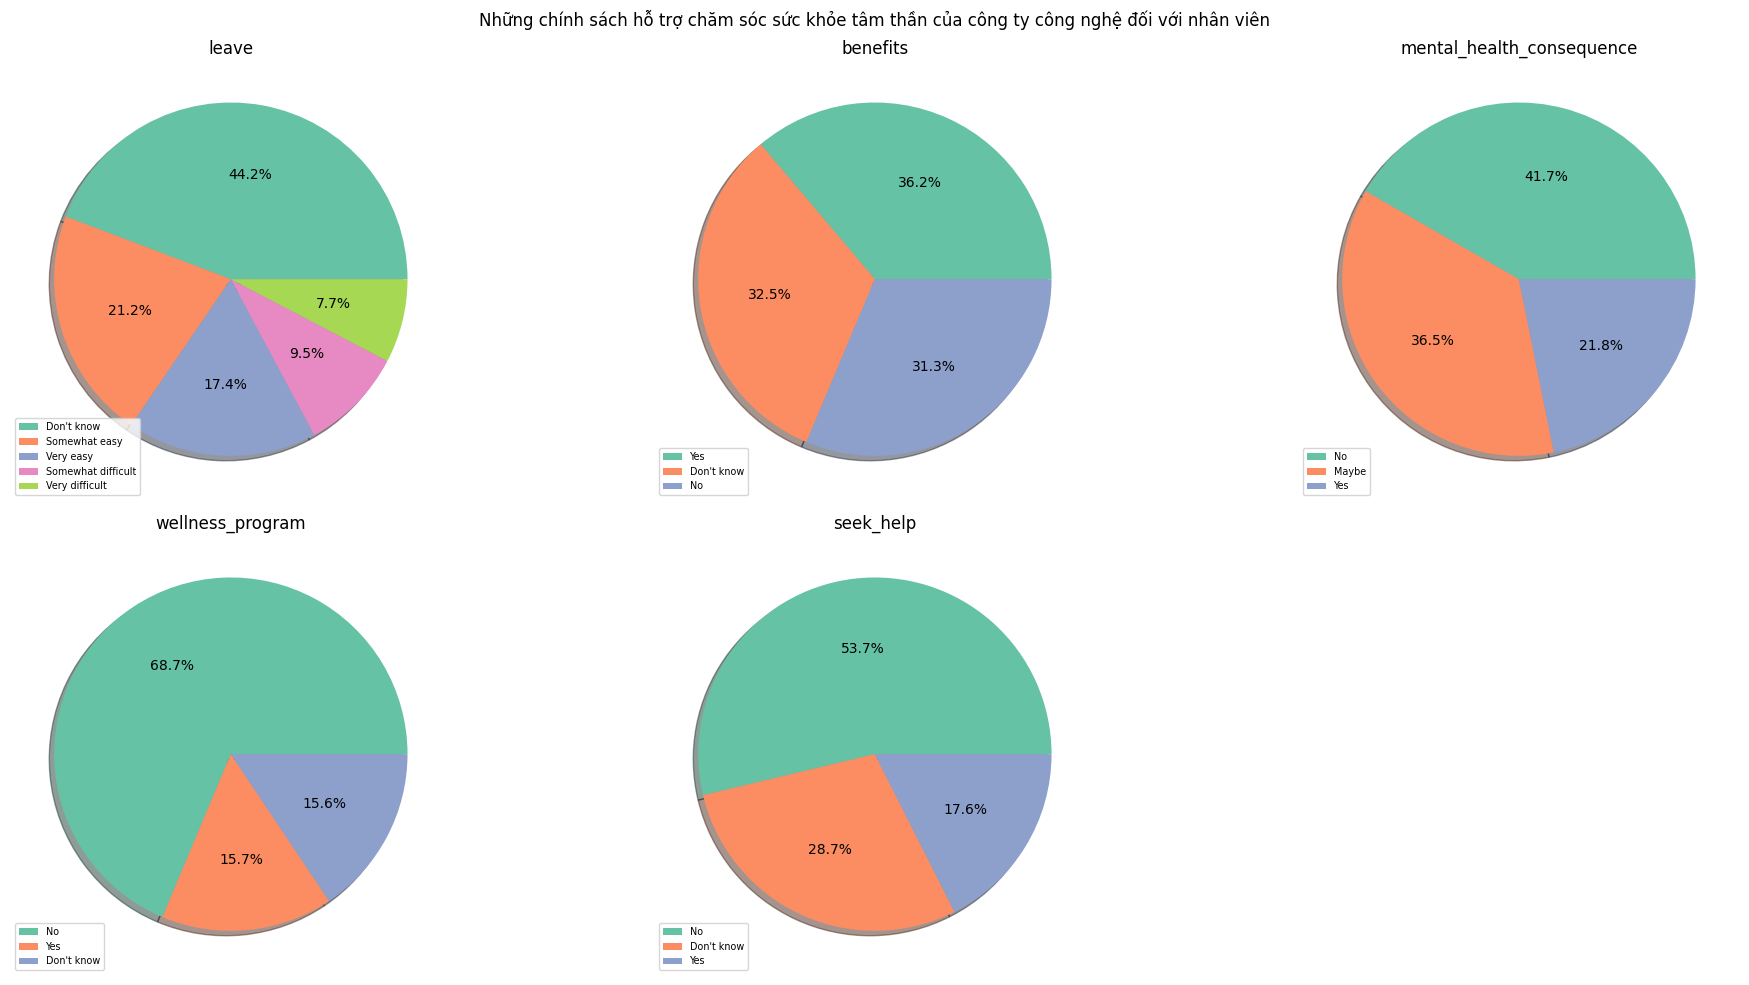

In [35]:
# Tạo grid subplots
num_rows = 2
num_cols = (len(mental_policy_distribution.columns) + 1) // num_rows
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))

# Làm phẳng axes để đơn giản hóa vòng lặp
axes = axes.flatten()

# Tạo margin = 0.2
margin = 0.2
plt.subplots_adjust(wspace=margin, hspace=margin)

# Tạo pie chart cho mỗi cột
for i, (column, ax) in enumerate(zip(mental_policy_distribution.columns, axes), 1):
    distribution = mental_policy_distribution[column][1]
    labels, values = zip(*distribution.items())

    wedges, texts, autotexts = ax.pie(values, labels=None, autopct='%1.1f%%', shadow=True, colors=sns.color_palette('Set2'),)
    ax.set_title(column, pad=0)

    # Tạo legend
    legend_labels = [f'{label}' for label, value in zip(labels, values)]
    ax.legend(legend_labels, loc='lower left', bbox_to_anchor=(0, 0), fontsize='x-small')

# Xóa subplots rỗng
for j in range(i, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Những chính sách hỗ trợ chăm sóc sức khỏe tâm thần của công ty công nghệ đối với nhân viên')
plt.tight_layout()
plt.show()

**Đánh giá tổng quan:**
- Ta thấy vào từng biểu đồ đều có lượng người không biết là trong công ty của mình có hỗ trợ (trên 15%) và trên 30% những người làm trong các công ty không được hưởng những chính sách về chăm sóc sức khỏe tâm thần, ta phân tích cụ thể như sau:
  - `leave` *(mức độ dễ dàng để xin nghỉ phép khi mắc vấn đề về tâm thần)*: số người không biết chiếm gần 1 nửa (44.2%), một số xin nghỉ phép tương đối khó (9.5%) và rất khó (7.7%).
  - `benefits` *(phúc lợi được hưởng)*: số người không biết chiếm 36%, và không được cung cấp phúc lợi là 31%.
  - `mental_health_consequence` *(hậu quả tiêu cực về tâm thần)*: số người không biết chiếm 36.5%, số người sẽ bị ảnh hưởng tiêu cực đến tâm thần là 21.8%.
  - `wellness_program` *(vấn đề tâm thần trong chương trình chăm sóc sức khỏe)*: số người không biết chiếm 15.6%, số không được hưởng chương trình này là 68.7%.
  - `seek_help` *(hỗ trợ tìm kiếm chăm sóc sức khỏe tâm thần)*: số người không biết chiếm 28.7%, không được hỗ trợ chiếm 53.7%.
- Những thông số này nói lên điều gì?
<blockquote>Ta có thể đánh giá được chính sách hỗ trợ sức khỏe của nhân viên tại một số công ty công nghệ tại thời điểm này là khá mơ hồ (vì có những người không biết) và dường như không quan tâm đến các vấn đề về sức khỏe tâm thần của nhân viên. Điều này ảnh hưởng rất lớn không chỉ đến sức khỏe của mỗi cá nhân trong công việc, mà còn gây ảnh hưởng đến sự phát triển của một công ty, làm dấy lên mối lo ngại về việc áp bức, bóc lột sức lao động của nhân viên tại các công ty này.

### Câu 2. Các vấn đề về tâm thần gây ảnh hưởng đến công việc của những người làm việc từ xa khác như thế nào so với những người làm việc trong văn phòng (theo mỗi giới tính)?

Ta lấy những cột cần thiết:

In [36]:
work_n_remote_df = raw_df[['Gender', 'work_interfere', 'remote_work']]
work_n_remote_df

,Gender,work_interfere,remote_work
0,Female,Often,No
1,Male,Rarely,No
2,Male,Rarely,No
3,Male,Often,No
4,Male,Never,Yes
...,...,...,...
1254,Male,NaN,No
1255,Male,Often,Yes
1256,Male,Sometimes,No
1257,Female,NaN,Yes


Từ phần khám phá dữ liệu, ta thấy `work_interfere` những dữ liệu không có giá trị chiếm khoảng **20%**. Ta sẽ lấp đầy những cột trống này bằng giá trị có tần suất xuất hiện nhiều nhất trong dữ liệu:

In [37]:
work_n_remote_df['work_interfere'].fillna(raw_df['work_interfere'].mode().values[0], inplace=True)
work_n_remote_df

,Gender,work_interfere,remote_work
0,Female,Often,No
1,Male,Rarely,No
2,Male,Rarely,No
3,Male,Often,No
4,Male,Never,Yes
...,...,...,...
1254,Male,Sometimes,No
1255,Male,Often,Yes
1256,Male,Sometimes,No
1257,Female,Sometimes,Yes


Ta lấy kích thước của từng bộ giá trị gom nhóm trong dữ liệu để lấy được số lượng người khảo sát theo `remote_work`, `Gender` và `work_interfere`

In [38]:
frequencies_df = work_n_remote_df.groupby(['remote_work', 'Gender', 'work_interfere']).size().unstack()
# thay những giá trị null bằng 0
frequencies_df.fillna(0, inplace=True)
frequencies_df

work_interfere      Never  Often  Rarely  Sometimes
remote_work Gender                                 
No          Female  20.00  19.00   29.00     107.00
            Male   136.00  71.00   87.00     400.00
            Others   1.00   3.00    3.00       7.00
Yes         Female   5.00  14.00   15.00      37.00
            Male    51.00  34.00   39.00     173.00
            Others   0.00   3.00    0.00       5.00

Đưa nó về dạng cột dài để thuận tiện cho thống kê số liệu lên biểu đồ:

In [39]:
melted_df = frequencies_df.reset_index().melt(id_vars=['Gender', 'remote_work'])
melted_df['percentage'] = melted_df.groupby(['Gender', 'remote_work'])['value'].transform(lambda x: x / x.sum() * 100).round(2)
melted_df

,Gender,remote_work,work_interfere,value,percentage
0,Female,No,Never,20.00,11.43
1,Male,No,Never,136.00,19.60
2,Others,No,Never,1.00,7.14
3,Female,Yes,Never,5.00,7.04
4,Male,Yes,Never,51.00,17.17
5,Others,Yes,Never,0.00,0.00
6,Female,No,Often,19.00,10.86
7,Male,No,Often,71.00,10.23
8,Others,No,Often,3.00,21.43
9,Female,Yes,Often,14.00,19.72


In [40]:
# tạo subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=["Biểu đồ dưới dạng số lượng người khảo sát", "Biểu đồ dưới dạng phần trăm người khảo sát (%)"])

# thiết kế layout cho biểu đồ
fig.update_layout(
    template="simple_white",
    barmode="stack",
    height=500,
    width=1400,
    title_text="So sánh tần suất ảnh hưởng đến công việc do vấn đề sức khỏe tâm thần đối với những người làm từ xa và văn phòng theo giới tính"
)

# color pallete
colors = ['#003f5c', "#7a5195", "#ef5675", '#ffa600']

# vòng lặp vẽ từng giá trị theo work_interfere dạng stack
for r, c in zip(melted_df.work_interfere.unique(), colors):
    plot_df = melted_df[melted_df.work_interfere == r]
    fig.add_trace(
        go.Bar(x=[plot_df.Gender, plot_df.remote_work], y=plot_df.value, name=r, marker_color=c, text=plot_df.value),
         row=1, col=1
    )
for r, c in zip(melted_df.work_interfere.unique(), colors):
    plot_df = melted_df[melted_df.work_interfere == r]
    fig.add_trace(
        go.Bar(x=[plot_df.Gender, plot_df.remote_work], y=plot_df.percentage, name=r, marker_color=c,  text=plot_df.percentage, showlegend=False, ),
        row=1, col=2
    )
# thêm các title cho axis
fig.update_yaxes(title_text="Số lượng", row=1, col=1)
fig.update_xaxes(title_text="Giới tính", row=1, col=1)
fig.update_yaxes(title_text="Phần trăm", row=1, col=2)
fig.update_xaxes(title_text="Giới tính", row=1, col=2)
fig

Nhìn vào 2 biểu đồ, ta có thể phân tích một số thông tin như sau:
- Về số lượng và mức độ chênh lệch về giới tính và môi trường làm việc:
    - Số lượng người khảo sát chiếm phần lớn là nam ($\geqslant$ 50%) kể cả làm từ xa hoặc không (gần 1000 người), với **70%** là làm việc văn phòng, **30%** là làm việc từ xa.
    - Số lượng nữ khá khiêm tốn khi tổng số người khảo sát chưa tới 300 người, trong đó khoảng **71%** là làm việc văn phòng, **29%** là làm việc từ xa. Vậy tỉ lệ làm việc ở 2 môi trường của nữ là gần như tương đồng với nam.
    - Số còn lại (Others) chiếm rất thấp và không đáng kể trong dữ liệu (chưa tới 30 người), với khoảng **64%** là làm việc trong văn phòng và **36%** là làm việc từ xa.
- Về tần suất ảnh hưởng đến công việc do các vấn đề về sức khỏe tâm thần:
    - Ở cả 3 `Gender`, phần lớn những người này đều thỉnh thoảng bị ảnh hưởng đến công việc cho các vấn đề về tâm thần (bằng chứng là tỉ lệ `Sometimes` ở cả hai môi trường đều rất cao, chiếm hơn 50% của mỗi cột). 
    - Những tần suất còn lại chiếm khá ít và mỗi tần suất thường chiếm khoảng từ **10% - 22%** (đặc biệt `Others` làm việc từ xa thường xuyên bị ảnh hưởng là **37.5%*8) trong mỗi `Gender`, trong đó:
      - `Often`: `Female` thường xuyên bị ảnh hưởng khi làm việc trong văn phòng là khoảng **11%**, làm từ xa là **20%**, `Male` làm trong văn phòng là khoảng **10%** và từ xa là **11.5%**, còn lại `Others` làm việc trong văn phòng là **21.5%** và từ xa là **37.5%** \
      -> Ta thấy tỉ lệ số người thường xuyên bị ảnh hưởng trong văn phòng lại luôn thấp hơn làm việc từ xa, điều này có kết luận gì?
      - `Rarely`: Tương tự như `Often`, tỉ lệ tần suất hiếm khi bị cản trở công việc khi làm việc trong văn phòng luôn thấp hơn làm từ xa (đối với Nam va Nữ). `Others` thì số lượng hiếm khi bị ảnh hưởng khi làm việc trong văn phòng là khoảng **21.5%**, còn làm từ xa là không có.
      - `Never`: Tỉ lệ phân bố của tần suất này thì lại ngược với `Often`, khi mà tỉ lệ những người làm việc tại văn phòng thì không bị ảnh hưởng đến công việc chiếm nhiều hơn so với làm việc từ xa.
**Dự đoán khả năng:** Với sự phân bố về số lượng cũng như tỉ lệ mỗi tần suất chiếm trong mỗi cột cho ta một số dự đoán như sau:
- Tỉ lệ `Sometimes` của mỗi cột đều khá đồng đều với nhau, chứng tỏ dù ở môi trường nào cũng sẽ có thế bị ảnh hưởng đến công việc do vấn đề về sức khỏe tâm thần (có thể đa phần đến từ khối lượng công việc và một số yếu tố tác động bên ngoài).
- Tỉ lệ phân bố trong giới tính khác `Others` có một chút khác biệt so với hai giới tính còn lại, khả năng là do số lượng những người khảo sát trong khoảng này là rất ít nên phân bố bị lệch khá nhiều, chiếm không đáng kể trong tập dữ liệu nên ta sẽ tập trung vào `Male` và `Female`.
- Tại sao tỉ lệ thường xuyên bị ảnh hưởng công việc (`Often`) do các vấn đề về tâm thần của những người đi làm việc văn phòng lại thấp hơn khi làm từ xa? Thường có khả năng là do môi trường làm việc bên ngoài bị ảnh hưởng khá nhiều do các yếu tố bên ngoài (tiếng ồn xung quanh, chuyện gia đình, cá nhân,...), còn khi làm việc trong văn phòng, thì đây là một môi trường chuyên làm việc, do đó nó rất ít bị ảnh hưởng đến những yếu tố bên ngoài nên tỉ lệ chiếm ít hơn là làm việc từ xa. Có thể tỉ lệ phân bố của `Never` và `Rarely` cũng là do nguyên nhân này.
<blockquote> Những thông số này cho ta biết được cho dù môi trường thay đổi thì vẫn sẽ có những lúc công việc bị ảnh hưởng do các vấn đề về tâm thần, việc gặp nhiều hay ít còn tùy vào công việc, đời sống sinh hoạt và một số tác nhân khác.

### Câu 3: Tình trạng sức khỏe tâm thần của nhân viên (từng giới) công ty công nghệ hiện nay như thế nào và họ quan tâm thế nào đến sức khỏe tâm thần của bản thân ?

Bước 1: Lọc lấy cái dòng dữ liệu của công ty công nghệ

In [41]:
copy_df = raw_df.copy()
copy_df = copy_df[copy_df['tech_company'] == 'Yes']
copy_df['tech_company'].value_counts()

tech_company
Yes    1031
Name: count, dtype: int64

Bước 2: Xóa bỏ cột `tech_company` trước khi khai thác

In [42]:
copy_df.drop(columns = ['tech_company'], inplace = True)

Bước 3: Tình hình sức khỏe tâm thần của nhân viên theo giới của các công ty công nghệ như thế nào?

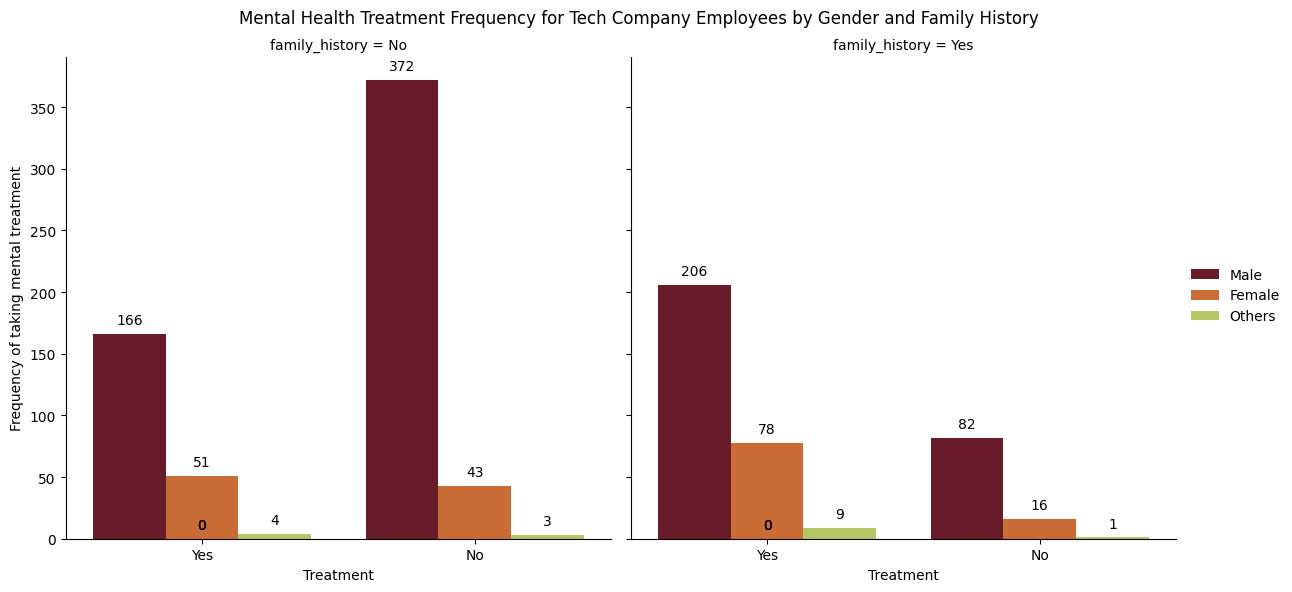

In [43]:
def annotate_bars(ax):
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', 
                    va = 'center', 
                    xytext = (0, 10), 
                    textcoords = 'offset points')

g = sns.FacetGrid(copy_df, col="family_history", height=6)
g.map(sns.countplot, 'treatment', hue=copy_df['Gender'], order=["Yes", "No"], hue_order=['Male', 'Female', 'Others'], palette = ['#750E21', '#E3651D', '#BED754'])
g.set_axis_labels('Treatment', 'Frequency of taking mental treatment')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Mental Health Treatment Frequency for Tech Company Employees by Gender and Family History')

for ax in g.axes.flat:
    annotate_bars(ax)

g.add_legend()

plt.show()

**Kết luận 1:** 
- Nhân viên với gia đình có *tiền sử bệnh tâm thần* thì nhân viên có xu hướng đã tiếp nhận điều trị tâm thần ròi và số lượng nhiều nhất ở Nam giới, tiếp đến là Nữ giới 
- Ngược lại ở nhân viên với gia đình không có tiền sử bệnh tâm thần, việc không tiếp nhận điều trị tâm thần có số lượng rất lớn, bên cạnh đó cũng phải nhắc đến mặc dù gia đình không có tiền sử bệnh tâm thần nhưng có tổng **164** Nam giới, **46** Nữ giới, và **11** giới khác tiếp nhận điều trị tâm thần khi so sánh với giới tương ứng khi nhân viên với gia đình có tiền sử bệnh tâm thần là **206**, **77**, và **10**

Bước 4: Sử dụng 2 cột dữ liệu mental_health_interviews và care_options để đánh giá mức độ quan tâm sức khỏe tâm thần của bản thân nhân viên. 

Cụ thể: Ta nhận thấy giá trị *Not Sure* của cột `care_options` mang ý nghĩa không chắc chắn như *Maybe* ở cột `mental_health_interview`, nên ta sẽ đưa *Not Sure* thành *Maybe* luôn để tiện so sánh, và vẽ đồ thị.

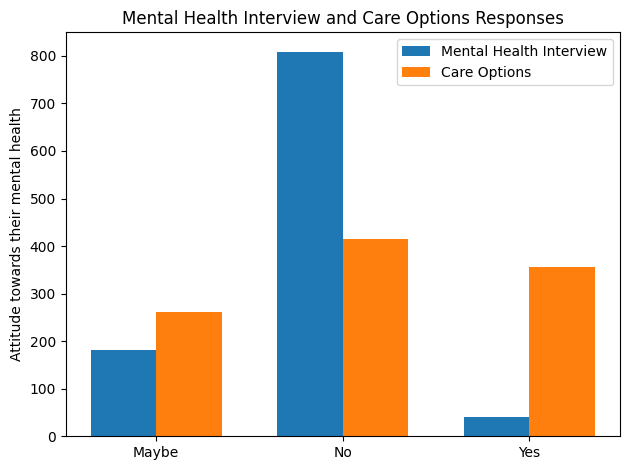

In [44]:
# replace 'Not sure' in column care_options by 'Maybe'
copy_df['care_options'] = copy_df['care_options'].replace('Not sure', 'Maybe')

mental_health_interview_counts = copy_df['mental_health_interview'].value_counts()
care_options_counts = copy_df['care_options'].value_counts()

df_counts = pd.DataFrame({'Mental Health Interview': mental_health_interview_counts, 
                          'Care Options': care_options_counts})


labels = df_counts.index
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

rects1 = ax.bar(np.arange(len(labels)) - width/2, df_counts['Mental Health Interview'], width, label='Mental Health Interview')
rects2 = ax.bar(np.arange(len(labels)) + width/2, df_counts['Care Options'], width, label='Care Options')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Attitude towards their mental health')
ax.set_title('Mental Health Interview and Care Options Responses')
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()

**Kết luận 2:** Đa số nhân viên công ty công nghệ chưa thật sự quan tâm đến sức khỏe tâm thần của bản thân khi ta có thể thấy rằng: 
- Phần lớn lựa chọn **No** cả về việc có nêu vấn đề sức khỏe tâm thần với nhà tuyển dụng và sự hiểu biết các lựa chọn chăm sóc tâm thần của chủ lao động cung cấp 
- Nhưng ta thấy sự an ủi ở việc nhân viên cũng có biết về các lựa chọn chăm sóc được chủ lao động cung cấp (356/1031 said **Yes**) mặc dù không có ý định sẽ bàn luận trong cuộc phỏng vấn với nhà tuyển dụng tiềm năng
- **261** ý kiến cho rằng không chắc chắn là biết về các lựa chọn chăm sóc sức khỏe tâm của chủ lao động cung cấp cùng với **182** lựa chọn lưỡng lự trong việc bàn luận sức khỏe tâm thần khi tham gia phỏng vấn tuyển dụng

In [45]:
print(mental_health_interview_counts, care_options_counts)

mental_health_interview
No       809
Maybe    182
Yes       40
Name: count, dtype: int64 care_options
No       414
Yes      356
Maybe    261
Name: count, dtype: int64


<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Review
</div>

Sau khi hoàn thành đồ án Lập trình cho Khoa học dữ liệu, chúng em đã có nhiều trải nghiệm quý giá và học hỏi được nhiều kiến thức mới. Đồ án này không chỉ giúp chúng em nắm bắt được lý thuyết mà còn cung cấp cơ hội để áp dụng những kiến thức đã học vào thực tế.

Báo cáo này sẽ tóm tắt quá trình thực hiện đồ án, những khó khăn mà chúng em đã gặp phải, cũng như những bài học rút ra được. Chúng em hy vọng rằng những trải nghiệm và kiến thức đã học được từ đồ án này sẽ là nền tảng vững chắc cho những dự án Khoa học dữ liệu trong tương lai.

## I. Khó khăn
### 1. Khó khăn chung:
- Quản lí thời gian để vừa học và nghiên cứu cho đồ án, vừa ôn thi cuối kì và làm những đồ án môn khác.

### 2. Từng thành viên:
- Trần Đình Nhật Trí:
    - Khó khăn trong việc merge code trên jupyter notebook do vấn đề về phần mềm và môi trường
    - Đắn đo trong việc lựa chọn và đưa ra câu hỏi hay và nặng ý nghĩa trong đồ án, liệu câu hỏi này có phù hợp hay không?
    - Khó khăn trong việc trình bày, mô tả quá trình và tổ chức code

- Nguyễn Thủy Uyên:
    - Cào dữ liệu mất nhiều thời gian và phải liên tục chỉnh sửa code do kết nối mạng và thay đổi bộ dữ liệu
    - Chưa thể tìm hiểu kĩ và hiểu rõ về các kiến thức ML, DL
    - Đắn đo trong việc lựa chọn và đưa ra câu hỏi
    - Tinh chỉnh siêu tham số chưa phù hợp dẫn đến mất thời gian

-  Nguyễn Ngọc Gia Minh:
    - Merge code dễ gây conflict vì tổ chức file không tương đồng, file notebook khó để merge
    - Tìm hiểu và khai thác được các câu hỏi thật sự mang ý nghĩa (cần kết hợp các cột dữ liệu ra sao, lựa chọn biểu đồ như thế nào, các bước giải quyết, nhận xét và đưa ra kết luận)

## II. Bài học kinh nghiệm của từng thành viên:
- Trần Đình Nhật Trí:
    - Cách xử lí conflict khi merge code.
    -Rèn dũa kĩ năng thảo luận, đóng góp và hỗ trợ các thành viên trong nhóm.
    - Quy trình làm một dự án dữ liệu hoàn chỉnh, rèn luyện được những kĩ năng cứng và mềm trong một dự án khoa học dữ liệu.
    - Tự học và nghiên cứu, tìm cách đưa ra vấn đề và giải quyết.
    - Học thêm được nhiều kiến thức mới lạ, thú vị trong chuyên ngành và biết cách triển khai một sản phẩm ra cho người dùng.

- Nguyễn Thủy Uyên:
    - Kĩ năng sử dụng github, kĩ năng thảo luận và làm việc nhóm.
    - Quản lí thời gian phù hợp và hiệu quả.
    - Tự học hỏi các kiến thức mới, cách giải quyết vấn đề trong python (sử dụng các function...).
    - Học được từ phần công việc của teammate (như Pipeline, deploy mô hình,...)
    - Quy trình hoàn thiện một dự án Khoa Học Dữ Liệu.

-  Nguyễn Ngọc Gia Minh:
    - Các bước thực hiện một project dữ liệu hoàn chỉnh là như thể nào?
    - Khả năng chịu đựng áp lực, bất đồng giữa thành viên trong nhóm
    - Khả năng sử dụng Git, Github gia tăng
    - Tự học được thêm nhiều thư viện, hàm hỗ trợ trong Python; các mô hình học máy, chọn lựa tham số tối ưu cho mô hình, triển khai mô hình
    - Cách làm việc trong một đội nhóm thật sự

## III. Nếu có nhiều thời gian hơn, nhóm sẽ:
Nhóm em sẽ thực hiện thêm một số thứ như sau: 
- Tiến hành cào thêm các cột dữ liệu như đánh giá của từng người chơi game (số giờ chơi, bình luận về game, đề xuất game hay không, số người dùng thấy đánh giá hữu ích, vui vẻ, ....)
- Sentiment analysis trên tập dữ liệu đó, xây dụng NLP, Recommender System, ....
- Khai thác nhiều hơn thông tin của từng game cào được như System requirements (hệ điều hành tương thích, lưu trữ tối thiểu cần có, RAM, ....) để cụ thể hơn việc khai thác thị trường người chơi game
- Thử cào dữ liệu bằng các cách mang lại hiệu suất cao hơn (ít tốn thời gian và tài nguyên máy tính hơn)
- Tìm hiểu thêm các mô hình của học máy dùng để xử lý text
- Tìm hiểu và cài đặt fine tuning cho mô hình được lựa chọn tốt hơn